###### Algorithm to plot the expected value of the absolute value of the spin projection in the Z axis for each gamma varying the films thickness. The simulation was made using a constant anisotropy K = 0.1, and changing a parameter Gamma (0.037, 0.111, 0.333, 1.000, 3.000 and 9.000) related with the superficial anisotropy. The thickness used in the simulation were d = 2, 4, 6, 8, 10, 12, 14 and 16.

In [1]:
%matplotlib inline

# Files management

In [2]:
import glob
import re
import collections

In [3]:
# Glob sirve para buscar archivos
files = {g: sorted(glob.glob('d*/k0.1/gamma%s/EstFinal.dat' % g)) for g in ('0.037', '0.111', '0.333', '1.000', '3.000', '9.000')}
files = collections.OrderedDict(sorted(files.items()))

filename = re.compile(r'd(?P<d>\d+)/k[0-9.]+/gamma[0-9.]+/EstFinal.dat')

for gamma, filenames in files.items():
    for file in filenames:
        match = filename.match(file)

###### The file 'EstFinal.dat' contains the following columns with information
- X position
- Y position
- Z position
- Boundarie flag
- Spin projection X
- Spin projection Y
- Spin projection Z

# Importing Modules

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import loadtxt
from scipy.optimize import curve_fit
from matplotlib import pylab

###### Function to compute the standard deviation

In [5]:
def SpVal_Z(Projection):
    return np.mean(np.abs(Projection))

###### Ploting the Standard Deviation of the Spin Z projection vs Thickness for each gamma

Nombre archivo 0.037
02 0.4686842 

Nombre archivo 0.037
08 0.4636154 

Nombre archivo 0.037
16 0.4355788 

Nombre archivo 0.111
02 0.4866926 

Nombre archivo 0.111
08 0.4077027 

Nombre archivo 0.111
16 0.352313375 

Nombre archivo 0.333
02 0.6301598 

Nombre archivo 0.333
08 0.382707 

Nombre archivo 0.333
16 0.34890745 

Nombre archivo 1.000
02 0.6063468 

Nombre archivo 1.000
08 0.40332825 

Nombre archivo 1.000
16 0.34950195 



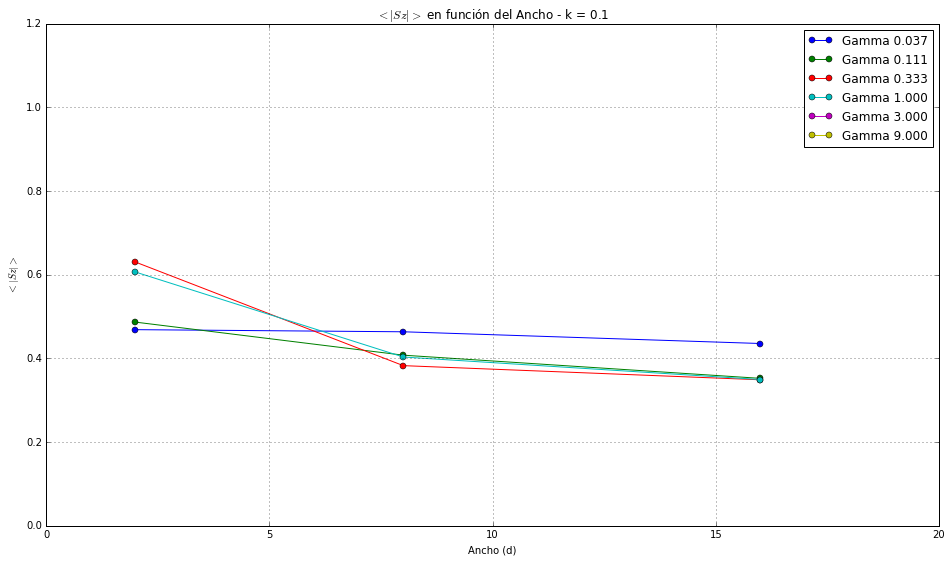

In [10]:
plt.figure(figsize=(16,9))

for gamma in files:
    Thickness = []
    MeanZ = []
    for file in files[gamma]:

        Sz = loadtxt(file, usecols=(6,), unpack=True)
        SzMean = SpVal_Z(Sz)
        d = filename.match(file).groupdict()['d']
        
        Thickness.append(d)
        MeanZ.append(SzMean)
        
        print('Nombre archivo', gamma)
        print(d, SzMean, "\n")
    
    plt.plot(Thickness, MeanZ,'-o', label = "Gamma {}".format(gamma))
    plt.axis([0., 20., 0., 1.2])
        
    
        
plt.legend(loc=0)
plt.xlabel('Ancho (d)')
plt.ylabel('$< \\vert Sz \\vert >$')
plt.title('$< \\vert Sz \\vert >$ en función del Ancho - k = 0.1')
plt.grid(True)
plt.savefig('04a_Graph_k01_Mean_Z_projection.pdf')
plt.show()